# Software effort estimation using GPT4

# Install and configure Open AI

In [ ]:
!pip install openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 360.4/360.4 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.4 MB/s eta 0:00:00


In [ ]:
%env OPENAI_API_KEY='<OPEN_AI_KEY>'

env: OPENAI_API_KEY=''


In [ ]:
from openai import OpenAI
client = OpenAI(organization='org-<ORG_KEY>')

In [ ]:
stream = client.chat.completions.create(
    model="gpt-4",
    messages=[{"role": "user", "content": "Say this is a test twice"}],
    stream=True,
)
for chunk in stream:
    if chunk.choices[0].delta.content is not None:
        print(chunk.choices[0].delta.content, end="")

NotFoundError: Error code: 404 - {'error': {'message': 'The model `gpt-4` does not exist or you do not have access to it.', 'type': 'invalid_request_error', 'param': None, 'code': 'model_not_found'}}

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Zero Shot Prompting

In [ ]:
import json
import uuid
import math
import logging

def split_and_convert_to_openai_jsonl(input_file, output_file_1, output_file_2):
    # Set up logging
    logging.basicConfig(level=logging.ERROR, format='%(asctime)s - %(levelname)s - %(message)s')

    # Read the input JSON file
    with open(input_file, 'r') as f:
        data = json.load(f)

    # Calculate the split point
    split_index = math.ceil(len(data) / 2)

    # Function to process and write data
    def process_batch(batch_data, output_file):
        successful_conversions = 0
        with open(output_file, 'w') as f:
            for item in batch_data:
                try:
                    custom_id = f"request-{str(uuid.uuid4())}"
                    messages = [
                        {"role": "system", "content": item['instruction']},
                        {"role": "user", "content": item['input'], "actual": item['output']}
                    ]
                    jsonl_object = {
                        "custom_id": custom_id,
                        "method": "POST",
                        "url": "/v1/chat/completions",
                        "body": {
                            "model": "gpt-4o-mini",
                            "messages": messages,
                            "max_tokens": 1000
                        }
                    }
                    f.write(json.dumps(jsonl_object) + '\n')
                    successful_conversions += 1
                except Exception as e:
                    logging.error(f"Error processing record: {str(e)}")
                    continue
        return successful_conversions

    # Process first batch
    successful_1 = process_batch(data[:split_index], output_file_1)
    print(f"Batch 1: {successful_1} records successfully converted. Output written to {output_file_1}")

    # Process second batch
    successful_2 = process_batch(data[split_index:], output_file_2)
    print(f"Batch 2: {successful_2} records successfully converted. Output written to {output_file_2}")

    total_successful = successful_1 + successful_2
    print(f"Total: {total_successful} out of {len(data)} records successfully converted.")

# Usage
input_file = '/content/drive/MyDrive/academic/AI ML/masters/experiments/gpt4/stories.json'
output_file_1 = '/content/drive/MyDrive/academic/AI ML/masters/experiments/gpt4/stories_openai_batch_1.jsonl'
output_file_2 = '/content/drive/MyDrive/academic/AI ML/masters/experiments/gpt4/stories_openai_batch_2.jsonl'

split_and_convert_to_openai_jsonl(input_file, output_file_1, output_file_2)

Batch 1: 11230 records successfully converted. Output written to /content/drive/MyDrive/academic/AI ML/masters/experiments/gpt4/stories_openai_batch_1.jsonl
Batch 2: 11229 records successfully converted. Output written to /content/drive/MyDrive/academic/AI ML/masters/experiments/gpt4/stories_openai_batch_2.jsonl
Total: 22459 out of 22459 records successfully converted.


In [ ]:
def load_jsonl(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            data.append(json.loads(line))
    return data

In [ ]:
first_file = load_jsonl('/content/drive/MyDrive/academic/AI ML/masters/experiments/gpt4/stories_openai_batch_1.jsonl')

In [ ]:
first_file[0]

{'custom_id': 'request-6c16669e-c4fe-4ff6-a715-2b606bad56f8',
 'method': 'POST',
 'url': '/v1/chat/completions',
 'body': {'model': 'gpt-4o-mini',
  'messages': [{'role': 'system',
    'content': 'give resolution time in minutes for the given user story, only provide the number of minutes in the output without any other text'},
   {'role': 'user',
    'content': '"As a developer, I\'d like to move k8s SPI to it\'s own repo."',
    'actual': '11833.0'}],
  'max_tokens': 1000}}

In [ ]:
second_file = load_jsonl('/content/drive/MyDrive/academic/AI ML/masters/experiments/gpt4/stories_openai_batch_2.jsonl')

In [ ]:
second_file[0]

{'custom_id': 'request-bd183af9-0348-475b-a425-7a790f151189',
 'method': 'POST',
 'url': '/v1/chat/completions',
 'body': {'model': 'gpt-4o-mini',
  'messages': [{'role': 'system',
    'content': 'give resolution time in minutes for the given user story, only provide the number of minutes in the output without any other text'},
   {'role': 'user',
    'content': '"I will be in Chile for a few days personal travel but I will take the opportunity to check in with Jacques Sebag, Luis Coral and others. If I can get up to the summit I will. ."',
    'actual': '40255.0'}],
  'max_tokens': 1000}}

In [ ]:
!pip install tiktoken

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.0 MB/s eta 0:00:00


In [ ]:
import json
import tiktoken

def count_tokens(input_file):
    # Initialize the tokenizer
    enc = tiktoken.encoding_for_model("gpt-4o-mini")

    # Initialize token counters
    total_tokens = 0
    max_tokens = 0

    # Read the input JSON file
    with open(input_file, 'r') as f:
        data = json.load(f)

    # Iterate through each item in the input data
    for item in data:
        # Count tokens for instruction and input
        instruction_tokens = len(enc.encode(item['instruction']))
        input_tokens = len(enc.encode(item['input']))

        # Sum tokens for this item
        item_tokens = instruction_tokens + input_tokens

        # Update total and max
        total_tokens += item_tokens
        max_tokens = max(max_tokens, item_tokens)

    # Calculate average tokens per item
    avg_tokens = total_tokens / len(data) if data else 0

    return {
        "total_tokens": total_tokens,
        "max_tokens": max_tokens,
        "avg_tokens": avg_tokens,
        "num_items": len(data)
    }

# Usage
input_file = '/content/drive/MyDrive/academic/AI ML/masters/experiments/gpt4/stories.json'
token_stats = count_tokens(input_file)

print(f"Total number of tokens: {token_stats['total_tokens']}")
print(f"Maximum tokens in a single item: {token_stats['max_tokens']}")
print(f"Average tokens per item: {token_stats['avg_tokens']:.2f}")
print(f"Number of items: {token_stats['num_items']}")

Total number of tokens: 2861964
Maximum tokens in a single item: 30098
Average tokens per item: 127.43
Number of items: 22459


In [ ]:
batch_input_file = client.files.create(
  file=open("/content/drive/MyDrive/academic/AI ML/masters/experiments/gpt4/stories_openai_batch_1.jsonl", "rb"),
  purpose="batch"
)

In [ ]:
batch_input_file_id = batch_input_file.id

client.batches.create(
    input_file_id=batch_input_file_id,
    endpoint="/v1/chat/completions",
    completion_window="24h",
    metadata={
      "description": "batch job for zero shot prompting of user stories"
    }
)

Batch(id='batch_TjDgiRSSOptKn1aaleK6tHAy', completion_window='24h', created_at=1722747729, endpoint='/v1/chat/completions', input_file_id='file-brWtGc7uumrlCzwI8Wn8GtTF', object='batch', status='validating', cancelled_at=None, cancelling_at=None, completed_at=None, error_file_id=None, errors=None, expired_at=None, expires_at=1722834129, failed_at=None, finalizing_at=None, in_progress_at=None, metadata={'description': 'batch job for zero shot prompting of user stories'}, output_file_id=None, request_counts=BatchRequestCounts(completed=0, failed=0, total=0))

In [ ]:
client.batches.retrieve("batch_TjDgiRSSOptKn1aaleK6tHAy")

Batch(id='batch_TjDgiRSSOptKn1aaleK6tHAy', completion_window='24h', created_at=1722747729, endpoint='/v1/chat/completions', input_file_id='file-brWtGc7uumrlCzwI8Wn8GtTF', object='batch', status='completed', cancelled_at=None, cancelling_at=None, completed_at=1722749579, error_file_id=None, errors=None, expired_at=None, expires_at=1722834129, failed_at=None, finalizing_at=1722748957, in_progress_at=1722747733, metadata={'description': 'batch job for zero shot prompting of user stories'}, output_file_id='file-5zqXyJIYyt0EFyil4hmrG6qT', request_counts=BatchRequestCounts(completed=11230, failed=0, total=11230))

In [ ]:
file_response = client.files.content("file-5zqXyJIYyt0EFyil4hmrG6qT")

In [ ]:
import json
import io

def write_file_response_to_jsonl(file_response, output_file):
    # Read the content from the HttpxBinaryResponseContent object
    content = file_response.read().decode('utf-8')

    # Convert the content to a string IO object
    content_io = io.StringIO(content)

    # Open the output file in write mode
    with open(output_file, 'w') as out_file:
        # Read the content line by line
        for line in content_io:
            # Parse each line as JSON
            try:
                json_object = json.loads(line)
                # Write the JSON object to the output file
                out_file.write(json.dumps(json_object) + '\n')
            except json.JSONDecodeError as e:
                print(f"Error decoding JSON: {e}")
                continue

    print(f"Output written to {output_file}")

# Usage


In [ ]:
output_file = '/content/drive/MyDrive/academic/AI ML/masters/experiments/gpt4/output_openai_batch_1.jsonl'
write_file_response_to_jsonl(file_response, output_file)

Output written to /content/drive/MyDrive/academic/AI ML/masters/experiments/gpt4/output_openai_batch_1.jsonl


In [ ]:
batch_input_file = client.files.create(
  file=open("/content/drive/MyDrive/academic/AI ML/masters/experiments/gpt4/stories_openai_batch_2.jsonl", "rb"),
  purpose="batch"
)

In [ ]:
batch_input_file_id = batch_input_file.id

client.batches.create(
    input_file_id=batch_input_file_id,
    endpoint="/v1/chat/completions",
    completion_window="24h",
    metadata={
      "description": "batch job for zero shot prompting of user stories"
    }
)

Batch(id='batch_TBZgchaXyuzV7UlBmiH2Vlu7', completion_window='24h', created_at=1722749823, endpoint='/v1/chat/completions', input_file_id='file-spfPnFd91EbJa9Ymj95UoGH2', object='batch', status='validating', cancelled_at=None, cancelling_at=None, completed_at=None, error_file_id=None, errors=None, expired_at=None, expires_at=1722836223, failed_at=None, finalizing_at=None, in_progress_at=None, metadata={'description': 'batch job for zero shot prompting of user stories'}, output_file_id=None, request_counts=BatchRequestCounts(completed=0, failed=0, total=0))

In [ ]:
client.batches.retrieve("batch_TBZgchaXyuzV7UlBmiH2Vlu7")

Batch(id='batch_TBZgchaXyuzV7UlBmiH2Vlu7', completion_window='24h', created_at=1722749823, endpoint='/v1/chat/completions', input_file_id='file-spfPnFd91EbJa9Ymj95UoGH2', object='batch', status='completed', cancelled_at=None, cancelling_at=None, completed_at=1722751695, error_file_id=None, errors=None, expired_at=None, expires_at=1722836223, failed_at=None, finalizing_at=1722751164, in_progress_at=1722749827, metadata={'description': 'batch job for zero shot prompting of user stories'}, output_file_id='file-uRDJPTCcPC9Exq0yBnZjruAA', request_counts=BatchRequestCounts(completed=11229, failed=0, total=11229))

In [ ]:
file_response = client.files.content("file-uRDJPTCcPC9Exq0yBnZjruAA")

In [ ]:
output_file = '/content/drive/MyDrive/academic/AI ML/masters/experiments/gpt4/output_openai_batch_2.jsonl'
write_file_response_to_jsonl(file_response, output_file)

Output written to /content/drive/MyDrive/academic/AI ML/masters/experiments/gpt4/output_openai_batch_2.jsonl


## Evaluation

In [2]:
import json

def combine_jsonl_files(input_file1, input_file2, output_file):
    with open(output_file, 'w') as outfile:
        # Process the first file
        with open(input_file1, 'r') as infile:
            for line in infile:
                outfile.write(line)

        # Process the second file
        with open(input_file2, 'r') as infile:
            for line in infile:
                outfile.write(line)

    print(f"Combined file written to {output_file}")

In [ ]:
# Usage
input_file1 = '/content/drive/MyDrive/academic/AI ML/masters/experiments/gpt4/output_openai_batch_1.jsonl'
input_file2 = '/content/drive/MyDrive/academic/AI ML/masters/experiments/gpt4/output_openai_batch_2.jsonl'
output_file = '/content/drive/MyDrive/academic/AI ML/masters/experiments/gpt4/zero_shot_prompt_output.jsonl'

In [ ]:
combine_jsonl_files(input_file1, input_file2, output_file)

Combined file written to /content/drive/MyDrive/academic/AI ML/masters/experiments/gpt4/zero_shot_prompt_output.jsonl


In [ ]:
# Usage
input_file1 = '/content/drive/MyDrive/academic/AI ML/masters/experiments/gpt4/stories_openai_batch_1.jsonl'
input_file2 = '/content/drive/MyDrive/academic/AI ML/masters/experiments/gpt4/stories_openai_batch_2.jsonl'
output_file = '/content/drive/MyDrive/academic/AI ML/masters/experiments/gpt4/stories_openai_combined_input.jsonl'

In [ ]:
combine_jsonl_files(input_file1, input_file2, output_file)

Combined file written to /content/drive/MyDrive/academic/AI ML/masters/experiments/gpt4/stories_openai_combined_input.jsonl


In [3]:
!pip install scikit-learn

In [4]:
def load_jsonl(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            data.append(json.loads(line))
    return data

In [5]:
predictions = load_jsonl('/content/drive/MyDrive/academic/AI ML/masters/experiments/gpt4/zero_shot_prompt_output.jsonl')
actuals = load_jsonl('/content/drive/MyDrive/academic/AI ML/masters/experiments/gpt4/stories_openai_combined_input.jsonl')

In [6]:
actuals[0]

{'custom_id': 'request-6c16669e-c4fe-4ff6-a715-2b606bad56f8',
 'method': 'POST',
 'url': '/v1/chat/completions',
 'body': {'model': 'gpt-4o-mini',
  'messages': [{'role': 'system',
    'content': 'give resolution time in minutes for the given user story, only provide the number of minutes in the output without any other text'},
   {'role': 'user',
    'content': '"As a developer, I\'d like to move k8s SPI to it\'s own repo."',
    'actual': '11833.0'}],
  'max_tokens': 1000}}

In [ ]:
actuals[0]['body']['messages'][1]['actual']

'11833.0'

In [ ]:
predictions[0]

{'id': 'batch_req_4a8NTEDxvIsMYdRnlhlIFCLc',
 'custom_id': 'request-b9d186ed-a6b1-4e66-9782-71f43f680f64',
 'response': {'status_code': 200,
  'request_id': '7cc5d09945e06fcf993a73f0765505da',
  'body': {'id': 'chatcmpl-9rb4WEk9CTIfq06C6dy9V77bp3nvO',
   'object': 'chat.completion',
   'created': 1722560916,
   'model': 'gpt-4o-mini-2024-07-18',
   'choices': [{'index': 0,
     'message': {'role': 'assistant', 'content': '120'},
     'logprobs': None,
     'finish_reason': 'stop'}],
   'usage': {'prompt_tokens': 52, 'completion_tokens': 1, 'total_tokens': 53},
   'system_fingerprint': 'fp_0f03d4f0ee'}},
 'error': None}

In [ ]:
predictions[0]['response']['body']['choices'][0]['message']['content']

'120'

In [7]:
import json
import math
from sklearn.metrics import mean_squared_error

def load_jsonl(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            data.append(json.loads(line))
    return data

def extract_values(data, is_prediction=False):
    values = []
    for item in data:
        if is_prediction:
            # Assuming the prediction is in the 'choices' field
            try:
                value = float(item['response']['body']['choices'][0]['message']['content'].strip())
                values.append(value)
            except (KeyError, ValueError, IndexError):
                print(f"Error extracting prediction value from: {item}")
        else:
            # Assuming the actual value is in the 'output' field
            try:
                value = float(item['body']['messages'][1]['actual'].strip())
                values.append(value)
            except (KeyError, ValueError):
                print(f"Error extracting actual value from: {item}")
    return values

def calculate_rmse(actual, predicted):
    return math.sqrt(mean_squared_error(actual, predicted))

# Load the data
predictions = load_jsonl('/content/drive/MyDrive/academic/AI ML/masters/experiments/gpt4/zero_shot_prompt_output.jsonl')
actuals = load_jsonl('/content/drive/MyDrive/academic/AI ML/masters/experiments/gpt4/stories_openai_combined_input.jsonl')

# Extract values
predicted_values = extract_values(predictions, is_prediction=True)
actual_values = extract_values(actuals)

# Ensure we have the same number of predictions and actuals
min_length = min(len(predicted_values), len(actual_values))
predicted_values = predicted_values[:min_length]
actual_values = actual_values[:min_length]

# Calculate RMSE
rmse = calculate_rmse(actual_values, predicted_values)

print(f"Number of samples analyzed: {min_length}")
print(f"Root Mean Square Error (RMSE): {rmse}")

# Additional statistics
absolute_errors = [abs(a - p) for a, p in zip(actual_values, predicted_values)]
mae = sum(absolute_errors) / len(absolute_errors)
max_error = max(absolute_errors)
min_error = min(absolute_errors)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Maximum Absolute Error: {max_error}")
print(f"Minimum Absolute Error: {min_error}")

Error extracting prediction value from: {'id': 'batch_req_MJAE5Spxif4BaDVRqNBtEI4L', 'custom_id': 'request-62af3a20-0803-46a1-a051-0450d9d639b3', 'response': {'status_code': 200, 'request_id': '403138c8fcfc8490951cab4404d864ea', 'body': {'id': 'chatcmpl-9sNlioag9Cr6pAe86ys8i2iFCGIfH', 'object': 'chat.completion', 'created': 1722748106, 'model': 'gpt-4o-mini-2024-07-18', 'choices': [{'index': 0, 'message': {'role': 'assistant', 'content': "I'm sorry, but I cannot access external documents, including Google Docs. Please provide the relevant details of the user story directly in the chat, and I'll be glad to help with the resolution time."}, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 74, 'completion_tokens': 39, 'total_tokens': 113}, 'system_fingerprint': 'fp_611b667b19'}}, 'error': None}
Error extracting prediction value from: {'id': 'batch_req_TASi81nlFfymAXF79gHoKhJZ', 'custom_id': 'request-0ee54453-7c70-4de6-85aa-550b9a8b8c13', 'response': {'status_code': 

In [8]:
import json
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def load_jsonl(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            data.append(json.loads(line))
    return data

def extract_values(data, is_prediction=False):
    values = []
    for item in data:
        if is_prediction:
            # Assuming the prediction is in the 'choices' field
            try:
                value = float(item['response']['body']['choices'][0]['message']['content'].strip())
                values.append(value)
            except (KeyError, ValueError, IndexError):
                print(f"Error extracting prediction value from: {item}")
        else:
            # Assuming the actual value is in the 'output' field
            try:
                value = float(item['body']['messages'][1]['actual'].strip())
                values.append(value)
            except (KeyError, ValueError):
                print(f"Error extracting actual value from: {item}")
    return values

def calculate_metrics(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    rmse = math.sqrt(mse)
    mae = mean_absolute_error(actual, predicted)
    r2 = r2_score(actual, predicted)
    return mse, rmse, mae, r2

# Load the data
predictions = load_jsonl('/content/drive/MyDrive/academic/AI ML/masters/experiments/gpt4/zero_shot_prompt_output.jsonl')
actuals = load_jsonl('/content/drive/MyDrive/academic/AI ML/masters/experiments/gpt4/stories_openai_combined_input.jsonl')

# Extract values
predicted_values = extract_values(predictions, is_prediction=True)
actual_values = extract_values(actuals)

# Ensure we have the same number of predictions and actuals
min_length = min(len(predicted_values), len(actual_values))
predicted_values = predicted_values[:min_length]
actual_values = actual_values[:min_length]

# Calculate metrics
mse, rmse, mae, r2 = calculate_metrics(actual_values, predicted_values)

print(f"Number of samples analyzed: {min_length}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Square Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²) Score: {r2}")

# Additional statistics
absolute_errors = [abs(a - p) for a, p in zip(actual_values, predicted_values)]
max_error = max(absolute_errors)
min_error = min(absolute_errors)

print(f"Maximum Absolute Error: {max_error}")
print(f"Minimum Absolute Error: {min_error}")


Error extracting prediction value from: {'id': 'batch_req_MJAE5Spxif4BaDVRqNBtEI4L', 'custom_id': 'request-62af3a20-0803-46a1-a051-0450d9d639b3', 'response': {'status_code': 200, 'request_id': '403138c8fcfc8490951cab4404d864ea', 'body': {'id': 'chatcmpl-9sNlioag9Cr6pAe86ys8i2iFCGIfH', 'object': 'chat.completion', 'created': 1722748106, 'model': 'gpt-4o-mini-2024-07-18', 'choices': [{'index': 0, 'message': {'role': 'assistant', 'content': "I'm sorry, but I cannot access external documents, including Google Docs. Please provide the relevant details of the user story directly in the chat, and I'll be glad to help with the resolution time."}, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 74, 'completion_tokens': 39, 'total_tokens': 113}, 'system_fingerprint': 'fp_611b667b19'}}, 'error': None}
Error extracting prediction value from: {'id': 'batch_req_TASi81nlFfymAXF79gHoKhJZ', 'custom_id': 'request-0ee54453-7c70-4de6-85aa-550b9a8b8c13', 'response': {'status_code': 

In [10]:
import numpy as np
from scipy import stats

def remove_outliers(actual, predicted, z_thresh=3):
    """
    Remove outliers based on Z-score.

    Parameters:
    - actual: list of actual values.
    - predicted: list of predicted values.
    - z_thresh: threshold of Z-score to identify outliers. Default is 3.

    Returns:
    - filtered_actual: list of actual values with outliers removed.
    - filtered_predicted: list of predicted values with outliers removed.
    """
    # Combine the actual and predicted values into a 2D array
    data = np.array(list(zip(actual, predicted)))

    # Calculate the Z-scores for the combined data
    z_scores = np.abs(stats.zscore(data))

    # Filter the data based on the Z-score threshold
    filtered_data = data[(z_scores < z_thresh).all(axis=1)]

    # Separate the filtered data back into actual and predicted values
    filtered_actual = filtered_data[:, 0]
    filtered_predicted = filtered_data[:, 1]

    return filtered_actual, filtered_predicted

# Remove outliers
filtered_actual_values, filtered_predicted_values = remove_outliers(actual_values, predicted_values, z_thresh=3)

# Print the number of samples before and after outlier removal
print(f"Number of samples before outlier treatment: {len(actual_values)}")
print(f"Number of samples after outlier treatment: {len(filtered_actual_values)}")

# Calculate metrics again after outlier treatment
mse, rmse, mae, r2 = calculate_metrics(filtered_actual_values, filtered_predicted_values)

print(f"\nMetrics after outlier treatment:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Square Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²) Score: {r2}")


Number of samples before outlier treatment: 22456
Number of samples after outlier treatment: 21772

Metrics after outlier treatment:
Mean Squared Error (MSE): 95895566227.75404
Root Mean Square Error (RMSE): 309670.09256264
Mean Absolute Error (MAE): 147287.42242329597
R-squared (R²) Score: -0.2922956093081006


In [ ]:
print(predicted_values[0],actual_values[0])

120.0 11833.0


In [ ]:
print(predicted_values[1],actual_values[1])

120.0 3006.0


In [ ]:
print(predicted_values[2],actual_values[2])

30.0 2807.0


In [ ]:
print(predicted_values[4],actual_values[4])

30.0 1530.0


In [ ]:
print(predicted_values[5],actual_values[5])

120.0 11534.0


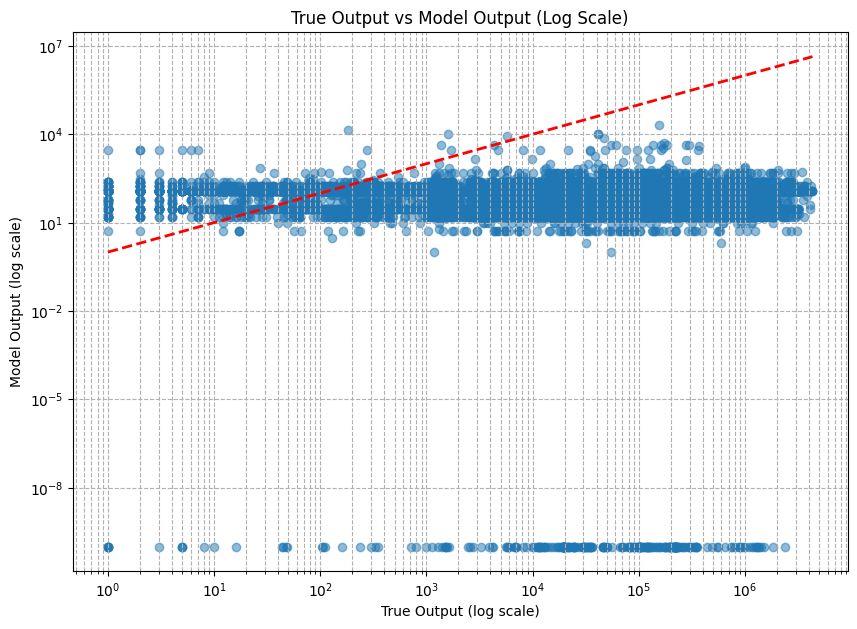

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure the values are positive and non-zero for the log scale
filtered_actual_values = [max(val, 1e-10) for val in actual_values]
filtered_predicted_values = [max(val, 1e-10) for val in predicted_values]

# Plotting
plt.figure(figsize=(10, 7))
plt.scatter(filtered_actual_values, filtered_predicted_values, alpha=0.5)
plt.plot([min(filtered_actual_values), max(filtered_actual_values)],
         [min(filtered_actual_values), max(filtered_actual_values)],
         color='red', linestyle='--', linewidth=2)

# Logarithmic scale
plt.xscale('log')
plt.yscale('log')

# Labels and title
plt.xlabel('True Output (log scale)')
plt.ylabel('Model Output (log scale)')
plt.title('True Output vs Model Output (Log Scale)')
plt.grid(True, which="both", ls="--")

# Show plot
plt.show()


In [12]:
import random

def print_random_samples(actual, predicted, num_samples=5):
    """
    Print random rows from the actual and predicted values.

    Parameters:
    - actual: list of actual values.
    - predicted: list of predicted values.
    - num_samples: number of random samples to print. Default is 5.
    """
    # Ensure we don't sample more than available data
    num_samples = min(num_samples, len(actual), len(predicted))

    # Get random indices
    random_indices = random.sample(range(len(actual)), num_samples)

    # Print the random samples
    print(f"{'Index':<10}{'Actual Value':<20}{'Predicted Value':<20}")
    print("-" * 50)
    for i in random_indices:
        print(f"{i:<10}{actual[i]:<20}{predicted[i]:<20}")

# Print 5 random samples from the filtered actual and predicted values
print_random_samples(filtered_actual_values, filtered_predicted_values)


Index     Actual Value        Predicted Value     
--------------------------------------------------
11237     7243.0              30.0                
21863     61973.0             120.0               
15355     57520.0             15.0                
6980      188019.0            120.0               
111       23095.0             240.0               


# Fine Tuning

In [ ]:
import json
import math

def convert_to_fine_tuning_format(input_file, output_file1, output_file2):
    # Read the input JSON file
    with open(input_file, 'r') as f:
        data = json.load(f)

    # Calculate the split point
    split_index = math.ceil(len(data) / 2)

    # Function to process and write data
    def process_batch(batch_data, output_file):
        with open(output_file, 'w') as f:
            for item in batch_data:
                fine_tuning_item = {
                    "messages": [
                        {
                            "role": "system",
                            "content": "You are an AI assistant that estimates the time required to complete user stories in minutes."
                        },
                        {
                            "role": "user",
                            "content": f"{item['instruction']}\n\n{item['input']}"
                        },
                        {
                            "role": "assistant",
                            "content": item['output']
                        }
                    ]
                }
                f.write(json.dumps(fine_tuning_item) + '\n')
        print(f"Processed batch written to {output_file}")

    # Process first batch
    process_batch(data[:split_index], output_file1)

    # Process second batch
    process_batch(data[split_index:], output_file2)

    print(f"Conversion complete. Data split into {output_file1} and {output_file2}")

In [ ]:
input_file = '/content/drive/MyDrive/academic/AI ML/masters/experiments/gpt4/stories.json'
output_file1 = '/content/drive/MyDrive/academic/AI ML/masters/experiments/gpt4/fine_tuning_data_batch1.jsonl'
output_file2 = '/content/drive/MyDrive/academic/AI ML/masters/experiments/gpt4/fine_tuning_data_batch2.jsonl'

convert_to_fine_tuning_format(input_file, output_file1, output_file2)

Processed batch written to /content/drive/MyDrive/academic/AI ML/masters/experiments/gpt4/fine_tuning_data_batch1.jsonl
Processed batch written to /content/drive/MyDrive/academic/AI ML/masters/experiments/gpt4/fine_tuning_data_batch2.jsonl
Conversion complete. Data split into /content/drive/MyDrive/academic/AI ML/masters/experiments/gpt4/fine_tuning_data_batch1.jsonl and /content/drive/MyDrive/academic/AI ML/masters/experiments/gpt4/fine_tuning_data_batch2.jsonl


In [ ]:
file_data = load_jsonl('/content/drive/MyDrive/academic/AI ML/masters/experiments/gpt4/fine_tuning_data_batch2.jsonl')

In [ ]:
file_data[0]

{'messages': [{'role': 'system',
   'content': 'You are an AI assistant that estimates the time required to complete user stories in minutes.'},
  {'role': 'user',
   'content': 'give resolution time in minutes for the given user story, only provide the number of minutes in the output without any other text\n\n"I will be in Chile for a few days personal travel but I will take the opportunity to check in with Jacques Sebag, Luis Coral and others. If I can get up to the summit I will. ."'},
  {'role': 'assistant', 'content': '40255.0'}]}

In [ ]:
len(file_data)

11229

In [ ]:
client.files.create(
  file=open("/content/drive/MyDrive/academic/AI ML/masters/experiments/gpt4/fine_tuning_data_batch1.jsonl", "rb"),
  purpose="fine-tune"
)

FileObject(id='file-d6rKKyuPP87d76seWv80WoYP', bytes=8965313, created_at=1722819490, filename='fine_tuning_data_batch1.jsonl', object='file', purpose='fine-tune', status='processed', status_details=None)

In [ ]:
client.fine_tuning.jobs.create(
  training_file="file-zKAaACINlowc0K1uQbUYkJBu",
  model="gpt-3.5-turbo"
)

BadRequestError: Error code: 400 - {'error': {'message': 'Your organization must qualify for at least usage tier 4 to fine-tune gpt-4o-mini-2024-07-18. See https://platform.openai.com/docs/guides/rate-limits/usage-tiers for more details on usage tiers.', 'type': 'invalid_request_error', 'param': None, 'code': 'below_usage_tier'}}

In [ ]:
!pip install tiktoken

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.8 MB/s eta 0:00:00


In [ ]:
import json
import tiktoken # for token counting
import numpy as np
from collections import defaultdict

In [ ]:
data_path = "/content/drive/MyDrive/academic/AI ML/masters/experiments/gpt4/fine_tuning_data_batch1.jsonl"

# Load the dataset
with open(data_path, 'r', encoding='utf-8') as f:
    dataset = [json.loads(line) for line in f]

# Initial dataset stats
print("Num examples:", len(dataset))
print("First example:")
for message in dataset[0]["messages"]:
    print(message)

Num examples: 11230
First example:
{'role': 'system', 'content': 'You are an AI assistant that estimates the time required to complete user stories in minutes.'}
{'role': 'user', 'content': 'give resolution time in minutes for the given user story, only provide the number of minutes in the output without any other text\n\n"As a developer, I\'d like to move k8s SPI to it\'s own repo."'}
{'role': 'assistant', 'content': '11833.0'}


In [ ]:
# Format error checks
format_errors = defaultdict(int)

for ex in dataset:
    if not isinstance(ex, dict):
        format_errors["data_type"] += 1
        continue

    messages = ex.get("messages", None)
    if not messages:
        format_errors["missing_messages_list"] += 1
        continue

    for message in messages:
        if "role" not in message or "content" not in message:
            format_errors["message_missing_key"] += 1

        if any(k not in ("role", "content", "name", "function_call", "weight") for k in message):
            format_errors["message_unrecognized_key"] += 1

        if message.get("role", None) not in ("system", "user", "assistant", "function"):
            format_errors["unrecognized_role"] += 1

        content = message.get("content", None)
        function_call = message.get("function_call", None)

        if (not content and not function_call) or not isinstance(content, str):
            format_errors["missing_content"] += 1

    if not any(message.get("role", None) == "assistant" for message in messages):
        format_errors["example_missing_assistant_message"] += 1

if format_errors:
    print("Found errors:")
    for k, v in format_errors.items():
        print(f"{k}: {v}")
else:
    print("No errors found")

No errors found
